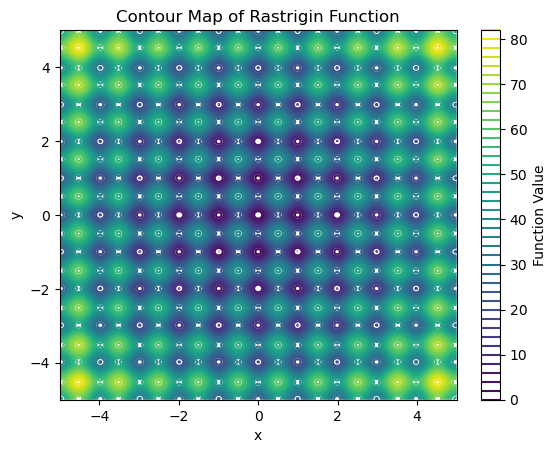

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rastrigin(x, y):
    return 20 + x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.title('Contour Map of Rastrigin Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
